In [7]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
script_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(script_dir, "..", "..", "..", "data"))

kmedoids_clusters_path = os.path.join(data_dir, "cluster_labels.npy")
quantum_clusters_path = os.path.join(data_dir, "final_quantum_clusters.npy")

In [9]:
kmedoids_labels = np.load(kmedoids_clusters_path)
quantum_labels = np.load(quantum_clusters_path)

print("First 10 K-Medoids Labels:", kmedoids_labels[:10])
print("First 10 Quantum Cluster Labels:", quantum_labels[:10])

First 10 K-Medoids Labels: [2 6 0 6 4 2 5 5 8 8]
First 10 Quantum Cluster Labels: [2 6 0 6 4 2 5 5 8 8]


In [10]:
unique_kmedoids = np.unique(kmedoids_labels)
unique_quantum = np.unique(quantum_labels)

print(f"Unique K-Medoids Clusters: {unique_kmedoids}")
print(f"Unique Quantum Clusters: {unique_quantum}")

Unique K-Medoids Clusters: [0 1 2 3 4 5 6 7 8 9]
Unique Quantum Clusters: [0 1 2 3 4 5 6 7 8 9]


In [11]:
matching_clusters = np.sum(kmedoids_labels == quantum_labels)
total_points = len(kmedoids_labels)

similarity_percentage = (matching_clusters / total_points) * 100
print(f"Percentage of identical cluster assignments: {similarity_percentage:.2f}%")

Percentage of identical cluster assignments: 100.00%


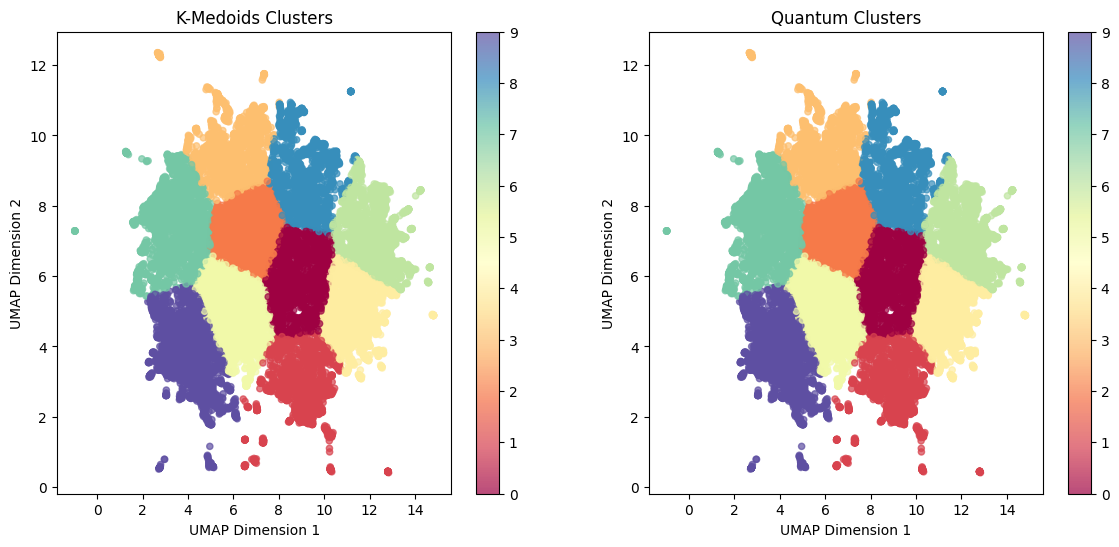

In [12]:
doc_embeddings_path = os.path.join(data_dir, "doc_embeddings_reduced.npy")
if not os.path.exists(doc_embeddings_path):
    raise FileNotFoundError("Missing reduced embeddings file.")

doc_embeddings = np.load(doc_embeddings_path)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

scatter1 = axes[0].scatter(doc_embeddings[:, 0], doc_embeddings[:, 1], c=kmedoids_labels, cmap='Spectral', s=20, alpha=0.7)
axes[0].set_title("K-Medoids Clusters")
axes[0].set_xlabel("UMAP Dimension 1")
axes[0].set_ylabel("UMAP Dimension 2")
plt.colorbar(scatter1, ax=axes[0])

scatter2 = axes[1].scatter(doc_embeddings[:, 0], doc_embeddings[:, 1], c=quantum_labels, cmap='Spectral', s=20, alpha=0.7)
axes[1].set_title("Quantum Clusters")
axes[1].set_xlabel("UMAP Dimension 1")
axes[1].set_ylabel("UMAP Dimension 2")
plt.colorbar(scatter2, ax=axes[1])

plt.show()